# Linear Regression on House Price Prediction

In [2]:
#Import Libraries
import numpy as np #handle table data
import pandas as pd #mathematical operation

## Load Data

In [3]:
df = pd.read_csv("house_rent.csv")

In [4]:
df.info #data structure

<bound method DataFrame.info of         Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair

In [5]:
df.isnull().sum() #Checking for null value 

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [6]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [7]:
df.head() #View First 5 rows

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [8]:
df.tail()  #View last 5 rows

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [9]:
df.shape #Count of Column and Row

(2000, 10)

In [10]:
df.columns #It will give columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [11]:
df.info() #column name, null value count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


### Data Cleaning

In [12]:
df.drop('Id',axis = 1, inplace = True) #Remove unneccesary column
#Id does NOT affect price
#It is just an identifier

In [13]:
df.columns #list of columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

### Convert Categorical → Numeric (CRITICAL)

In [14]:
# One-Hot Encoding
df_enclosed = pd.get_dummies(
    df,
    columns = ['Location','Condition','Garage'],
    drop_first = True
)

In [15]:
df_enclosed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Area               2000 non-null   int64
 1   Bedrooms           2000 non-null   int64
 2   Bathrooms          2000 non-null   int64
 3   Floors             2000 non-null   int64
 4   YearBuilt          2000 non-null   int64
 5   Price              2000 non-null   int64
 6   Location_Rural     2000 non-null   bool 
 7   Location_Suburban  2000 non-null   bool 
 8   Location_Urban     2000 non-null   bool 
 9   Condition_Fair     2000 non-null   bool 
 10  Condition_Good     2000 non-null   bool 
 11  Condition_Poor     2000 non-null   bool 
 12  Garage_Yes         2000 non-null   bool 
dtypes: bool(7), int64(6)
memory usage: 107.6 KB


### Separate Features & Target

In [16]:
X = df_enclosed.drop('Price',axis = 1) #Drop target column from X

In [17]:
y = df_enclosed['Price'] #Assign target column for y

### Split Data (Train & Test)

In [18]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size =0.2,
    random_state = 42
)

### Train Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions

In [20]:
# Predict house prices on test data
y_pred = model.predict(X_test)

### Evaluate Model Performance

In [21]:
#Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE",rmse)
print("R^2: ",r2)
'''
MAE → average error in price
RMSE → penalizes big errors
R² score:
    1.0 → perfect
    0.7+ → good
    0.5 → average
'''
# When data is non-linear, Linear Regression is not the right model.

MAE : 243241.97758826384
RMSE 279859.72583784326
R^2:  -0.006717808430749761


'\nMAE → average error in price\nRMSE → penalizes big errors\nR² score:\n    1.0 → perfect\n    0.7+ → good\n    0.5 → average\n'

### Interpret Coefficients

In [22]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)
'''
Positive coefficient → increases price
Negative coefficient → decreases price
'''

'\nPositive coefficient → increases price\nNegative coefficient → decreases price\n'

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(
    df_enclosed.drop('Price', axis=1)
)
y = df_enclosed['Price']


## Actual Price vs Predicted Price
##### To see how close predictions are to real values.

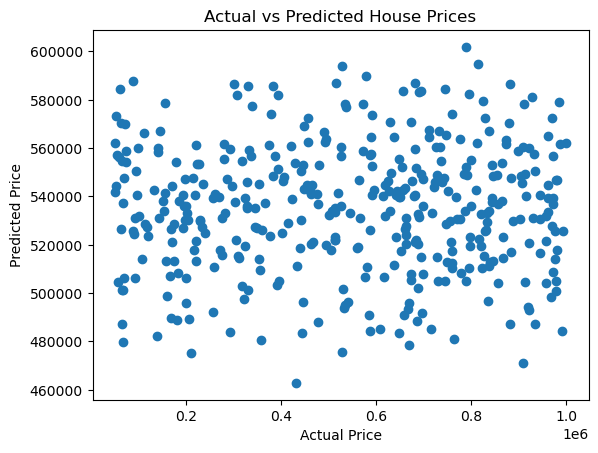

'\nPoints close to the diagonal → good model\nScattered points → errors\n'

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
'''
Points close to the diagonal → good model
Scattered points → errors
'''


## Residual Plot

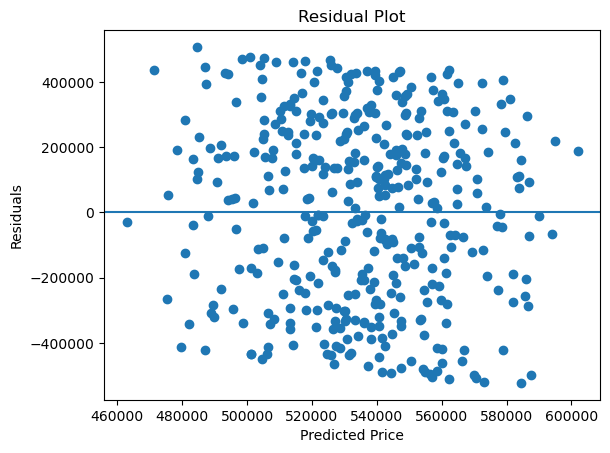

'\nRandom scatter around 0 → good\n\nPattern / curve → model issue\n'

In [26]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
#Residual = Actual Price − Predicted Price
'''
Random scatter around 0 → good

Pattern / curve → model issue
'''


## Regression Line

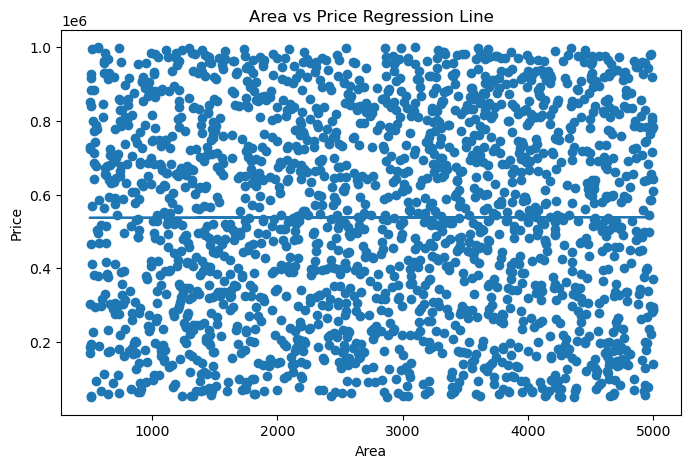

In [31]:
from sklearn.linear_model import LinearRegression

X_area = df[['Area']]
y_price = df['Price']

model_simple = LinearRegression()
model_simple.fit(X_area, y_price)

plt.figure(figsize=(8, 5))
plt.scatter(X_area, y_price)
plt.plot(X_area, model_simple.predict(X_area))
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price Regression Line")
plt.show()
